In [ ]:

import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import re
import nltk
import json
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from keras import models
from keras import layers
from tensorflow.keras.layers import LSTM,GRU
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.preprocessing.text import Tokenizer
np.random.seed(42)

In [ ]:

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
file_id = '1u5tlexc5xV-PhQ6a_4LJDAh3Gx_ihv3s' 
downloaded = drive.CreateFile({'id': file_id})

downloaded.GetContentFile('test.csv')

In [ ]:
file_id = '1FLyZUTGX2kEBr0tH7H65s4k0W0fh1b_1' 
downloaded = drive.CreateFile({'id': file_id})

downloaded.GetContentFile('train.csv')  

In [ ]:
raw_train_data = pd.read_csv('train.csv') 
raw_test_data = pd.read_csv('test.csv')


In [ ]:
raw_train_data.head(8)

,id,cleaned,classes,labels
0,0,মেডিকেলে এসে ঠিক ফ্যামিলির ফটো ফ্রেম এর মতো মন...,sadness,1
1,1,অনেক দিন পর অন্য রকম অনুভূতি হচ্ছে কেননা আমার...,sadness,1
2,2,আগে যতোটা বেশি পছন্দ করতাম দুশ্চরিত্রা মিথিলা ...,disgust,3
3,3,মাঝে মাঝে মনে হয় তোমাকে চাওয়াটা অনেক ভুল হয়ত ভ...,sadness,1
4,4,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,fear,5
5,5,কান্নার জল সবাই দেখে হৃদয়ের কষ্ট কেউ দেখেনা প...,sadness,1
6,6,নির্বাচনের সময় কস্ট করে ভোট চাইসে এর চেয়ে বেশি...,disgust,3
7,7,দাদা আপনার video গুলো ভালো লাগে ডকুমেন্টারি টা...,joy,0


In [ ]:
id = 3000
cleanedd = raw_train_data.iloc[id]

In [ ]:
print("Text: {}".format(cleanedd["cleaned"]))
print("Text sentiment: {}".format(cleanedd["classes"]))

Text: এতো দিন পর তাহসিন ভাই বিশ্বাস করেন ভালো করে মজা দিছেন আমাদের কে ধন্যবাদ এতো মজা করে রোস্ট টা করার জন্য আপনার মুখে একটু আকটু বকা গুলো শুনতে খুব ভালো লাগে
Text sentiment: joy


In [ ]:
print("number of train data :{}",format(len(raw_train_data)))

number of train data :{} 4994


In [ ]:
import matplotlib.pyplot as plt

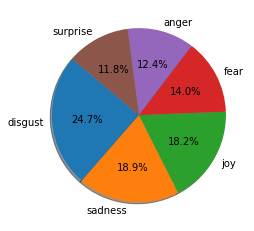

In [ ]:
sentiment_count = raw_train_data["classes"].value_counts()
plt.pie(sentiment_count, labels=sentiment_count.index,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

In [ ]:
import seaborn as sns

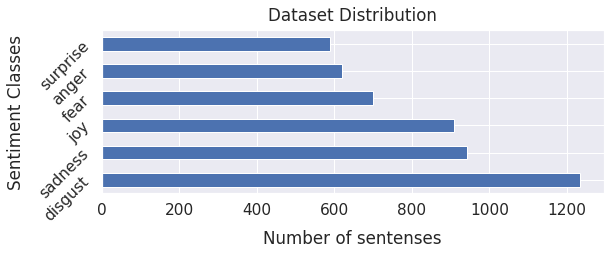

In [ ]:
sns.set(font_scale=1.4)
raw_train_data['classes'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of sentenses", labelpad=12)
plt.ylabel("Sentiment Classes", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [ ]:
import re

In [ ]:
def rem_special_characters(texts):
    pattern = re.compile('[!@#$%^&*()_+-={}\[\];:\'\"\|<>,.///?`~।]', flags=re.I)
    return pattern.sub(r'', texts)

def rem_non_bangla_characters(texts):
    pattern = re.compile('[A-Z]', flags=re.I)
    return pattern.sub(r'', texts)

def rem_emoticons(texts):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',texts)


def remove_duplicate(dataframe,column_name):
   final_df = df.drop_duplicates(subset=column_name)
   return final_df

In [ ]:
pip install -U scikit-learn

In [ ]:
pip install bnlp_toolkit

     |████████████████████████████████| 1.2 MB 34.3 MB/s 
     |████████████████████████████████| 23.9 MB 1.3 MB/s 
     |████████████████████████████████| 965 kB 49.8 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
pip install python-Levenshtein

     |████████████████████████████████| 50 kB 5.4 MB/s 
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.2-cp37-cp37m-linux_x86_64.whl size=149860 sha256=e120304d2013623d1ca3e110fcb7debe78ed8e097f28251db2786e9204483c90
  Stored in directory: /root/.cache/pip/wheels/05/5f/ca/7c4367734892581bb5ff896f15027a932c551080b2abd3e00d
Successfully built python-Levenshtein


In [ ]:
from bnlp import NLTKTokenizer
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

bnltk = NLTKTokenizer()

punkt not found. downloading...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
def custom_tokenize(texts):
      result = bnltk.word_tokenize(texts)
      return result

In [ ]:
pip install bangla-stemmer

In [ ]:
from bangla_stemmer.stemmer import stemmer
stmr = stemmer.BanglaStemmer()


In [ ]:
def stem_tokens(tokens, stemmerr):
  token_list = []
  for token in tokens:
    token_list.append(stemmerr.stem(token))
   
  return token_list

In [ ]:
def process_text(texts , verbose=False):
  if verbose: print("Initial texts: {}".format(texts))


  texts = rem_special_characters(texts) 
  texts = rem_special_characters(texts)
  texts = rem_emoticons(texts)
 

  if verbose: print("Post  processing texts: {}".format(texts))

 

  ## Tokenization & Stemming
 
  tokens = custom_tokenize(texts)
  stemmer = stmr
  
  stemm = stem_tokens(tokens, stemmer) 

  return stemm

In [ ]:
random = "আমি RT @ ভাত খাই সে বাজারে যায় তিনি কি সত্যিই ভালো মানুষ"

In [ ]:
print(process_text(random, verbose=False))

applied first rules..
applied fourth rules..
applied first rules..
['আমি', 'RT', 'ভাত', 'খাই', 'সে', 'বাজারে', 'যায়', 'তিনি', 'কি', 'সত্যি', 'ভালো', 'মানুষ']


In [ ]:
pip install -U scikit-learn

In [ ]:
raw_train_data["tokens"] = raw_train_data["cleaned"].apply(process_text)
raw_test_data["tokens"] = raw_test_data["cleaned"].apply(process_text)
raw_train_data.head(10)

Streaming output truncated to the last 5000 lines.
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules

,id,cleaned,classes,labels,tokens
0,0,মেডিকেলে এসে ঠিক ফ্যামিলির ফটো ফ্রেম এর মতো মন...,sadness,1,"[মেডিকেল, এসে, ঠিক, ফ্যামিলির, ফটো, ফ্রেম, এর,..."
1,1,অনেক দিন পর অন্য রকম অনুভূতি হচ্ছে কেননা আমার...,sadness,1,"[অনেক, দিন, পর, অন্য, রকম, অনুভূতি, হচ্, কেননা..."
2,2,আগে যতোটা বেশি পছন্দ করতাম দুশ্চরিত্রা মিথিলা ...,disgust,3,"[আগে, যতো, বেশি, পছন্দ, করতাম, দুশ্চরিত্, মিথি..."
3,3,মাঝে মাঝে মনে হয় তোমাকে চাওয়াটা অনেক ভুল হয়ত ভ...,sadness,1,"[মাঝে, মাঝে, মনে, হয়, তোমাকে, চাওয়া, অনেক, ভুল..."
4,4,এখানে কাওকে কবর দিয়ো না তাহলে তোমাদের পরিবারের...,fear,5,"[এখানে, কাওকে, কবর, দিয়ো, না, তাহলে, তোমা, পরি..."
5,5,কান্নার জল সবাই দেখে হৃদয়ের কষ্ট কেউ দেখেনা প...,sadness,1,"[কান্ন, জল, সবা, দাখ, হৃদয়, কষ্ট, কেউ, দেখেনা..."
6,6,নির্বাচনের সময় কস্ট করে ভোট চাইসে এর চেয়ে বেশি...,disgust,3,"[নির্বাচন, সময়, কস্ট, করে, ভোট, চাইসে, এর, চায়..."
7,7,দাদা আপনার video গুলো ভালো লাগে ডকুমেন্টারি টা...,joy,0,"[দাদা, আপন, video, গুলো, ভালো, লাগে, ডকুমেন্টা..."
8,8,বাস্তবতা এটাই কেউ সারাজীবন সুখ চেয়েও পায় নাআর ...,sadness,1,"[বাস্তবতা, এটা, কেউ, সারাজীবন, সুখ, চায়, পায়, ..."
9,9,কিন্ত ভয় কিসের থেকে আমি জানতামনা কিন্ত আমার মন...,fear,5,"[কিন্ত, ভয়, কিস, থেক, আমি, জানতামনা, কিন্ত, আম..."


In [ ]:
raw_test_data.head(10)

,id,cleaned,classes,labels,tokens
0,0,দুই বছরের ব্যবধানে বগুড়া থেকে বিদেশে পণ্য রপ্ত...,joy,0,"[দুই, বছর, ব্যবধানে, বগুড়া, থেক, বিদেশ, পণ্য, ..."
1,1,আওয়ামী লীগ সরকার বাংলাদেশকে অন্ধকার কুয়া থেকে ...,joy,0,"[আওয়ামী, লীগ, সরক, বাংলাদেশ, অন্ধক, কুয়া, থেক,..."
2,2,চোখ কচলাতে কচলাতে বেশ রাগান্বীত কন্ঠ বলল ধুরো ...,disgust,3,"[চোখ, কচলা, কচলা, বেশ, রাগান্বীত, কন্ঠ, বলল, ধ..."
3,3,মেয়েটা অতিরিক্ত আত্মপরিচয় সংকটে ভুগে সাবিলা স্...,disgust,3,"[মেয়েটা, অতিরিক্ত, আত্মপরিচয়, সংকটে, ভুগে, সাব..."
4,4,এবার উন্নয়ন মুলক কাজের কিছু দৃশ্যমান পরিদশন ক...,joy,0,"[এব, উন্নয়ন, মুলক, কাজ, কিছু, দৃশ্যমান, পরিদশ..."
5,5,আওয়ামী লীগ সরকারের টানা ১০ বছর অর্থমন্ত্রীর দা...,disgust,3,"[আওয়ামী, লীগ, সরকার, টানা, ১০, বছর, অর্থমন্ত্র..."
6,6,স্কুইল নামক এক ঔষধি গাছের বিভিন্ন উপাদানের সাথ...,surprise,2,"[স্কুইল, নামক, এক, ঔষধি, গাছ, বিভিন্ন, উপাদান,..."
7,7,ভেবে খুব খারাপ লাগছে বাংলাদেশের মেধাবী মানুষগ...,sadness,1,"[ভাব, খুব, খারাপ, লাগ, বাংলাদেশের, মেধাবী, মান..."
8,8,তারপর হঠাৎ করেই আলেকজান্ডার তার বুকেফ্যালাসের ...,surprise,2,"[তারপর, হঠাৎ, করে, আলেকজান্ড, তার, বুকেফ্যালাস..."
9,9,তো এই অবস্থায় আমি এসব সংবাদ আমি একদম নিতে পারি...,fear,5,"[তো, এই, অবস্থায়, আমি, এসব, সংবাদ, আমি, একদম, ..."


In [ ]:
#Creating training data
train_data = raw_train_data.tokens.tolist()
train_labels = raw_train_data.labels.tolist()

#Creating testing data
test_data = raw_test_data.tokens.tolist()
test_labels = raw_test_data.labels.tolist()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
def fit_cv(text_corpus):
  cv_vect = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x)
  cv_vect.fit(text_corpus)
  return cv_vect

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
def fit_tfidf(text_corpus):
  tf_vect = TfidfVectorizer(preprocessor=lambda x: x,
                            tokenizer=lambda x: x)
  tf_vect.fit(text_corpus)
  return tf_vect

In [ ]:
import seaborn as sn

def plot_confusion(cm):
  plt.figure(figsize = (5,5))
  sn.heatmap(cm, annot=True, cmap="Blues", fmt='.0f')
  plt.xlabel("Prediction")
  plt.ylabel("True value")
  plt.title("Confusion Matrix")
  return sn

In [ ]:
cv = fit_cv(train_data)
train_data_cv = cv.transform(train_data)
test_data_cv = cv.transform(test_data)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [ ]:
def fit_lr(train_data, train_labels):
  model = LogisticRegression()
  model.fit(train_data, train_labels)
  return model

In [ ]:
model_lr_cv = fit_lr(train_data_cv, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
tf = fit_tfidf(train_data)
train_data_tf = tf.transform(train_data)
test_data_tf = tf.transform(test_data)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  "The parameter 'token_pattern' will not be used"


In [ ]:
model_lr_tf = fit_lr(train_data_tf, train_labels)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred_lr_tf = model_lr_tf.predict(test_data_tf)

In [ ]:
print("LR Model Accuracy: {:.2%}".format(accuracy_score(test_labels, y_pred_lr_tf)))

LR Model Accuracy: 59.20%


In [ ]:
def predict_text(texts):
  processed_text = process_text(texts)
  transformed_text = tf.transform([processed_text])
  prediction = model_lr_tf.predict(transformed_text)

  if prediction == 1:
    return "sentiment of the text is sadness"
  elif prediction == 2:
    return  "sentiment of the text is surprise"
  elif prediction == 3:
    return  "sentiment of the text is disgust"
  elif prediction == 0:
    return  "sentiment of the text is joy"
  elif prediction == 5:
    return  "sentiment of the text is fear"
  else:
    return "sentiment of the text is fear"


In [ ]:
texts = "ভেবে খুব খারাপ লাগছে "

predict_text(texts)


applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..


'sentiment of the text is sadness'